# **Data Science on birth rate analysis**

> This project come from:  
> [Birth Rate Analysis Project - Aman Kharwal](https://amanxai.com/2020/05/08/birth-rate-analysis/)

## Initialisation

In [101]:
# Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
sns.set()

In [102]:
# Loading the data
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


### Some EDA

In [103]:
births.info()

<class 'pandas.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  str    
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), str(1)
memory usage: 607.4 KB


In [104]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


## Let's clean and prepare our data

In [105]:
# Let's look if there is NaN values
births.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [106]:
# Fill the NaN values of 'day' column by 0
births['day'] = births['day'].fillna(value=0)
births.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [107]:
# Let's convert the 'day' column in int
births['day'] = births['day'].apply(int)
births.info()

<class 'pandas.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    15547 non-null  int64
 1   month   15547 non-null  int64
 2   day     15547 non-null  int64
 3   gender  15547 non-null  str  
 4   births  15547 non-null  int64
dtypes: int64(4), str(1)
memory usage: 607.4 KB


In [108]:
# Finally, create a new column 'decade' to gather the years by decade
births['decade'] = (births['year']//10)*10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


## Let's do the analyse of our data

In [109]:
# Create a pivot table 
pivot_table = pd.pivot_table(data=births, values='births', index='decade', columns='gender', aggfunc='sum')
pivot_table.head()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


## Go visualizing it

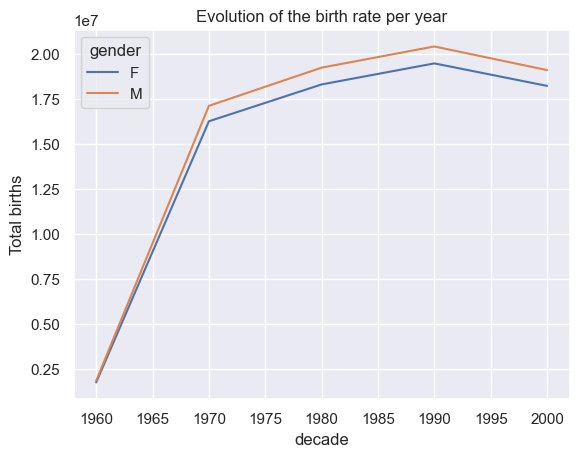

In [110]:
pivot_table.plot()
plt.ylabel("Total births")
plt.title("Evolution of the birth rate per year")
plt.show()

## Let's do more cleaning and some statistics

In [111]:
# Calculate percentiles
quartiles = np.percentile(births['births'], [25, 50, 75])
print(f"25th percentile: {quartiles[0]:.0f}")
print(f"50th percentile: {quartiles[1]:.0f}")
print(f"75th percentile: {quartiles[2]:.0f}")

25th percentile: 4358
50th percentile: 4814
75th percentile: 5290


In [112]:
# Define mu and sig
mu = quartiles[1]
sig = 0.74*(quartiles[2] - quartiles[0])

print(f"Mu = {mu}")
print(f"Sigma = {sig}")

Mu = 4814.0
Sigma = 689.31


In [113]:
# Keep only the births between mu+-5*sig
births = births.query('(births > @mu-5*@sig) & (births < @mu+5*@sig)')
births['day'] = births['day'].apply(int)
births.shape

(14610, 6)

## Let's plot some time series

In [114]:
# Create an temporal index
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format='%Y%m%d')
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


### Lets look per weekday

In [115]:
# Analysis per weekday
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


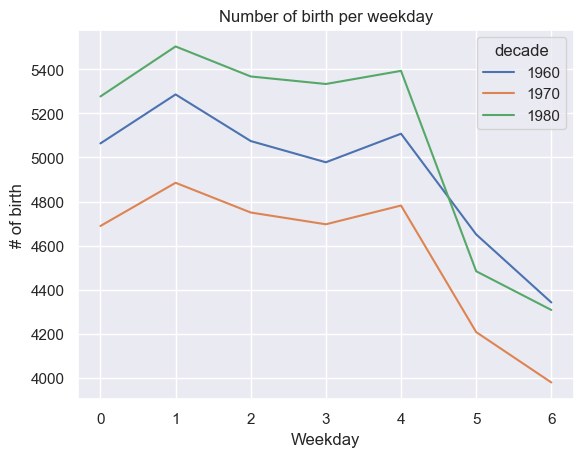

In [116]:
births_by_weekday = births.pivot_table(values='births', index='dayofweek', columns='decade', aggfunc='mean')
births_by_weekday.plot()
plt.title('Number of birth per weekday')
plt.xlabel('Weekday')
plt.ylabel('# of birth')
plt.show()

### Lets look on a year

In [117]:
# Now, what about the season?
births_by_date = births.pivot_table(values='births', index=[births.index.month, births.index.day], aggfunc='mean')
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [118]:
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]

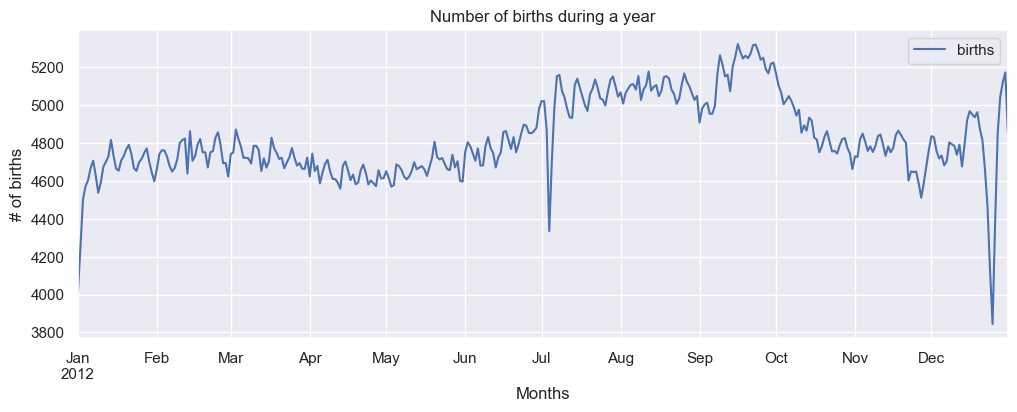

In [119]:
# Visualization
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
plt.title('Number of births during a year')
plt.xlabel('Months')
plt.ylabel('# of births')
plt.savefig('Output_3.png', dpi=300, bbox_inches='tight')
plt.show()

## Let's visualize the 3 outputs together

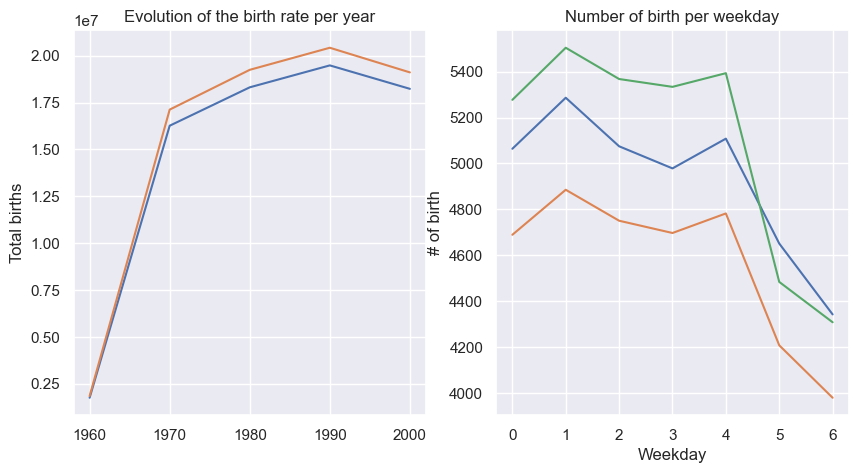

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(pivot_table)
plt.ylabel("Total births")
plt.title("Evolution of the birth rate per year")

plt.subplot(1,2,2)
plt.plot(births_by_weekday)
plt.title('Number of birth per weekday')
plt.xlabel('Weekday')
plt.ylabel('# of birth')
plt.savefig('Outputs.png', dpi=300, bbox_inches='tight')
plt.show()